# Project Overview
- With this project I plan to look how the concentration of people with Bachelor's Degrees can affect the Median Household Income and Unemployment Rate in a state.

In [1]:
# Import the libraries needed for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json

# Data Cleaning
- Read files into dataframe and skip to rows where the data is located
- Take only the columns we need from the dataframes
- Rename the columns, so it's easier to understand
- Create a function that takes the state as a parameter and returns a joint dataframe of the economic data and education data

In [2]:
# Read excel files into dataframes
# Skip to the rows where the data actually starts
df_edu = pd.read_excel("Education.xls", skiprows=4)
df_income = pd.read_excel("Unemployment.xls", skiprows=7)

In [3]:
# Get only the columns that we need
df_edu = df_edu[['FIPS Code',
                 'State',
                 'Area name',
                 'Percent of adults with less than a high school diploma, 2014-18',
                 'Percent of adults with a high school diploma only, 2014-18',
                 "Percent of adults completing some college or associate's degree, 2014-18",
                 "Percent of adults with a bachelor's degree or higher, 2014-18"]]

df_income = df_income[['FIPStxt',
                       'Stabr',
                       'area_name',
                       'Civilian_labor_force_2018',
                       'Employed_2018',
                       'Unemployed_2018',
                       'Unemployment_rate_2018', 
                       'Civilian_labor_force_2019',
                       'Employed_2019',
                       'Unemployed_2019',
                       'Unemployment_rate_2019',
                       'Median_Household_Income_2018']]

In [4]:
# Let's rename our columns (they're messy)
df_edu = df_edu.rename(columns = {'Percent of adults with less than a high school diploma, 2014-18':"Below High School Diploma",
       'Percent of adults with a high school diploma only, 2014-18':"High School Diploma Only" ,
       "Percent of adults completing some college or associate's degree, 2014-18": "Some College or Associate's Degree",
       "Percent of adults with a bachelor's degree or higher, 2014-18": "Bachelor's Degree or Higher"})

df_edu.head()

,FIPS Code,State,Area name,Below High School Diploma,High School Diploma Only,Some College or Associate's Degree,Bachelor's Degree or Higher
0,0,US,United States,12.3,27.1,29.0,31.5
1,1000,AL,Alabama,14.2,30.9,29.9,24.9
2,1001,AL,Autauga County,11.3,32.6,28.4,27.7
3,1003,AL,Baldwin County,9.7,27.6,31.3,31.3
4,1005,AL,Barbour County,27.0,35.7,25.1,12.2


In [5]:
# Same with the income dataframe
df_income = df_income.rename(columns={"FIPStxt":"FIPS Code",
                                      "Stabr":"State",
                                      "area_name":"Area name"})

df_income.head()

,FIPS Code,State,Area name,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2018
0,0,US,United States,161389026.0,155102319.0,6286707.0,3.895375,163100055.0,157115247.0,5984808.0,3.669409,61937.0
1,1000,AL,Alabama,2216627.0,2130845.0,85782.0,3.900000,2241747.0,2174483.0,67264.0,3.000000,49881.0
2,1001,AL,"Autauga County, AL",26196.0,25261.0,935.0,3.600000,26172.0,25458.0,714.0,2.700000,59338.0
3,1003,AL,"Baldwin County, AL",95233.0,91809.0,3424.0,3.600000,97328.0,94675.0,2653.0,2.700000,57588.0
4,1005,AL,"Barbour County, AL",8414.0,7987.0,427.0,5.100000,8537.0,8213.0,324.0,3.800000,34382.0


In [6]:
# Renaming some more columns
df_income = df_income.rename(columns={'Civilian_labor_force_2018':"Civilian Labor Force 2018",
       'Employed_2018': "Number Employed 2018",'Unemployed_2018': "Number Unemployed 2018", 'Unemployment_rate_2018': "Unemployment Rate 2018",
       'Civilian_labor_force_2019':"Civilian Labor Force 2019", 'Employed_2019':"Number Employed 2019", 'Unemployed_2019':"Number Unemployed 2019",
       'Unemployment_rate_2019': "Unemployment Rate 2019", 'Median_Household_Income_2018': "Median Household Income 2018"})

In [7]:
# Much better
df_income.head()

,FIPS Code,State,Area name,Civilian Labor Force 2018,Number Employed 2018,Number Unemployed 2018,Unemployment Rate 2018,Civilian Labor Force 2019,Number Employed 2019,Number Unemployed 2019,Unemployment Rate 2019,Median Household Income 2018
0,0,US,United States,161389026.0,155102319.0,6286707.0,3.895375,163100055.0,157115247.0,5984808.0,3.669409,61937.0
1,1000,AL,Alabama,2216627.0,2130845.0,85782.0,3.900000,2241747.0,2174483.0,67264.0,3.000000,49881.0
2,1001,AL,"Autauga County, AL",26196.0,25261.0,935.0,3.600000,26172.0,25458.0,714.0,2.700000,59338.0
3,1003,AL,"Baldwin County, AL",95233.0,91809.0,3424.0,3.600000,97328.0,94675.0,2653.0,2.700000,57588.0
4,1005,AL,"Barbour County, AL",8414.0,7987.0,427.0,5.100000,8537.0,8213.0,324.0,3.800000,34382.0


In [8]:
# Function that takes state as parameter and return dataframe
# Dataframe of income and education in that state by area

def get_dataframe(state):
    # Making abbreviation uppercase
    state = state.upper()
    
    # Condition to return rows from that state in each dataframe
    state_edu = df_edu["State"] == state
    state_income = df_income["State"] == state
    
    # Create a dataframe for all the data on that state
    df_state_data =  pd.DataFrame(columns = ["State",
                                           "Area name",
                                           "Unemployment Rate 2018",
                                           "Unemployment Rate 2019",
                                           "Median Household Income 2018",
                                           "Below High School Diploma",
                                           "High School Diploma Only",
                                           "Some College or Associate's Degree",
                                           "Bachelor's Degree or Higher"])
   
    # Get the rows for that state 
    df_state_edu = df_edu[state_edu]
    df_state_income = df_income[state_income]
    
    # Get the names of each area
    for area in df_state_edu["Area name"]:
        
        # Complete the area name to use in income dataframe
        area_state = area + f", {state}"
        
        # Get information from that specific area
        area_edu = df_state_edu["Area name"] == area
        area_income = df_state_income["Area name"] == area_state
        
        # Get data on the education and convert it to float
        below_high_school = float(df_state_edu[area_edu]["Below High School Diploma"])
        high_school = float(df_state_edu[area_edu]["High School Diploma Only"])
        some_college = float(df_state_edu[area_edu]["Some College or Associate's Degree"])
        bachelors = float(df_state_edu[area_edu]["Bachelor's Degree or Higher"])
        
        # Get data on income then convert into float
        unemployment_2018 = df_state_income[area_income]["Unemployment Rate 2018"]
        unemployment_2019 = df_state_income[area_income]["Unemployment Rate 2019"]
        income_2018 = df_state_income[area_income]["Median Household Income 2018"]
       
    
        # If the area name is in our data we'll add data to our new dataframe
        area_list = str(list(df_state_income["Area name"]))
        
        if area_state in area_list:
            
            # Add to our dataframe
            df_state_data = df_state_data.append({"State":state,
                                               "Area name": area,
                                               "Unemployment Rate 2018":float(unemployment_2018),
                                               "Unemployment Rate 2019":float(unemployment_2019),
                                               "Median Household Income 2018":float(income_2018),
                                                "Below High School Diploma": below_high_school,
                                                "High School Diploma Only":high_school,
                                                "Some College or Associate's Degree":some_college,
                                               "Bachelor's Degree or Higher": bachelors},
                                               ignore_index = True)
            
    # Return the full dataframe for that state
    return df_state_data

In [9]:
# To see exactly what we did
# This will come in handy later
state = "ny"
df_state = get_dataframe(state)
df_state.head()

,State,Area name,Unemployment Rate 2018,Unemployment Rate 2019,Median Household Income 2018,Below High School Diploma,High School Diploma Only,Some College or Associate's Degree,Bachelor's Degree or Higher
0,NY,Albany County,3.7,3.6,64536.0,7.3,24.1,27.3,41.3
1,NY,Allegany County,5.6,5.5,46262.0,10.0,36.7,33.1,20.2
2,NY,Bronx County,5.8,5.4,38566.0,28.0,27.6,24.5,19.8
3,NY,Broome County,4.9,4.7,50928.0,9.5,31.1,31.1,28.3
4,NY,Cattaraugus County,5.3,5.1,48017.0,11.5,39.4,30.0,19.1


# EDA
- Create a correlation matrix
- Create a heatmap to visualize the correlations
- Get the correlation for Bachelor's Degree vs Median Household Income and Bachelor's Degree vs. Unemployment Rate
- Display them on a choropleth map (colors state by scale)

In [10]:
# Now let's make a correlation matrix of this data
corr_matrix = df_state.corr()
corr_matrix

,Unemployment Rate 2018,Unemployment Rate 2019,Median Household Income 2018,Below High School Diploma,High School Diploma Only,Some College or Associate's Degree,Bachelor's Degree or Higher
Unemployment Rate 2018,1.000000,0.982649,-0.624481,0.340166,0.549454,0.468332,-0.672063
Unemployment Rate 2019,0.982649,1.000000,-0.636973,0.284426,0.575707,0.479975,-0.673504
Median Household Income 2018,-0.624481,-0.636973,1.000000,-0.267656,-0.630424,-0.506425,0.713204
Below High School Diploma,0.340166,0.284426,-0.267656,1.000000,0.040421,-0.240245,-0.289341
High School Diploma Only,0.549454,0.575707,-0.630424,0.040421,1.000000,0.625522,-0.919333
Some College or Associate's Degree,0.468332,0.479975,-0.506425,-0.240245,0.625522,1.000000,-0.729396
Bachelor's Degree or Higher,-0.672063,-0.673504,0.713204,-0.289341,-0.919333,-0.729396,1.000000


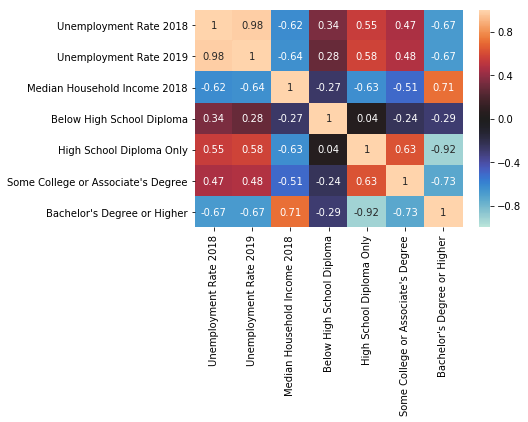

In [11]:
# Let's visualize it better
sns.heatmap(corr_matrix, annot=True, vmin = -1,vmax=1,center = 0)

In [12]:
# Now, lets get what we want
# We'll get the correlations that effect income
df_income_corr = corr_matrix[["Median Household Income 2018"]]
df_income_corr

,Median Household Income 2018
Unemployment Rate 2018,-0.624481
Unemployment Rate 2019,-0.636973
Median Household Income 2018,1.000000
Below High School Diploma,-0.267656
High School Diploma Only,-0.630424
Some College or Associate's Degree,-0.506425
Bachelor's Degree or Higher,0.713204


In [13]:
# Now, let see the correlations for unemployment
df_unemployment_corr = corr_matrix[["Unemployment Rate 2018"]]
df_unemployment_corr

,Unemployment Rate 2018
Unemployment Rate 2018,1.000000
Unemployment Rate 2019,0.982649
Median Household Income 2018,-0.624481
Below High School Diploma,0.340166
High School Diploma Only,0.549454
Some College or Associate's Degree,0.468332
Bachelor's Degree or Higher,-0.672063


In [14]:
# Now we can get the correlation for income and education
# As well as unemployment rate and education
unemployment_vs_edu = df_unemployment_corr.loc["Bachelor's Degree or Higher"]
income_vs_edu = df_income_corr.loc["Bachelor's Degree or Higher"]

In [15]:
# Let's see what we have now
unemployment_vs_edu

Unemployment Rate 2018   -0.672063
Name: Bachelor's Degree or Higher, dtype: float64

In [16]:
# To get just the value
unemployment_vs_edu[0]

-0.6720633013690186

In [17]:
# Same with income
income_vs_edu

Median Household Income 2018    0.713204
Name: Bachelor's Degree or Higher, dtype: float64

In [18]:
# Just the value
income_vs_edu[0]

0.7132044015878445

In [19]:
# We can repeat this process for all the available states
# Get the correlation for each state
states = ["AL", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

def get_corr_df(list_of_states):
    
    # Dataframe that will hold the correlations
    states_corr = pd.DataFrame(columns = ["State",
                                         "Education vs. Unemployment Rate",
                                         "Education vs. Median Household Income"])
    # Go through each state
    for state in list_of_states:
        
        # Get full dataframe from that state
        state_df = get_dataframe(state)
        
        # Dataframe of correlation between variables
        state_corr = state_df.corr()
        
        # Get correlations for 2018 income and unemployment rate
        income_corr = state_corr[["Median Household Income 2018"]]
        unemployment_corr = state_corr[["Unemployment Rate 2018"]]
        
        # Add this to dataframe with state and correlation values
        states_corr = states_corr.append({"State":state,
                                          "Education vs. Unemployment Rate":unemployment_corr.loc["Bachelor's Degree or Higher"][0],
                                          "Education vs. Median Household Income":income_corr.loc["Bachelor's Degree or Higher"][0]}, 
                                         ignore_index=True)
        
    return states_corr

In [20]:
# Run the function to get our dataframe
# What you see are correlation metrics for the each state
states_corr = get_corr_df(states)
states_corr.head()

,State,Education vs. Unemployment Rate,Education vs. Median Household Income
0,AL,-0.352903,0.697541
1,AZ,-0.352274,0.522120
2,AR,-0.424540,0.682458
3,CA,-0.620988,0.860620
4,CO,-0.238584,0.766018


# Data Visualization
- Create choropleth map by correlation metric
- Use matplotlib to display scatter plot of what the correlation means
- Add best fit line to the plot to show the correlation

In [66]:
# Let's visualize the data
us_geo = "us-states.json"


us_map_unemployment = folium.Map(location=[37,-100], zoom_start=4.3, titles = "Mapbox Bright")

In [120]:
# Create plain map
us_map_income = folium.Map(location=[37,-100], zoom_start=4.3, titles = "stamerwatercolor")

# Now let's add color based on income correlation
choropleth = folium.Choropleth(geo_data=us_geo,
                 data = states_corr,
                 columns = ["State", "Education vs. Median Household Income"],
                 key_on = "feature.id",
                 fill_color = "PuBuGn",
                 fill_opacity = 0.7,
                 line_opacity = 0.2,
                 highligt=True,
                 smooth_factor =0,
                 legend_name = "Correlation Between Education and Median Household Income").add_to(us_map_income)

# Adding a title
title_html = "<h3 align=\"center\" style=\"font-size:20px\"><b>People with Bachelor's Degrees(%) vs Median Household Income</b></h3>"
us_map_income.get_root().html.add_child(folium.Element(title_html))

# Add state labels
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(["name"], style=style_function, labels=False))

# Visualize and save the map
us_map_income.save(outfile="IncomeCorrelation.html")
us_map_income

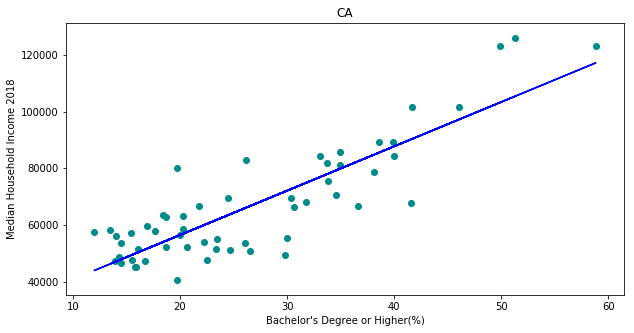

In [171]:
# What does this mean
# To see exactly what we did
# This will come in handy later
state = "ca"
df_state = get_dataframe(state)

x = df_state["Bachelor's Degree or Higher"]
y = df_state["Median Household Income 2018"]

plt.figure(figsize=(10,5))

m, b = np.polyfit(x,y,1)
plt.plot(x, m*x+b,'b')
plt.scatter(x,y, color='darkcyan')
plt.xlabel("Bachelor's Degree or Higher(%)")
plt.ylabel("Median Household Income 2018")
plt.title(state.upper())
plt.savefig("CaliIncome.png")
plt.show()

In [123]:
# Create plain map
us_map_unemployment = folium.Map(location=[37,-100], zoom_start=4.3, titles = "Mapbox Bright")

# Now let's add color based on income correlation
choropleth = folium.Choropleth(geo_data=us_geo,
                 data = states_corr,
                 columns = ["State", "Education vs. Unemployment Rate"],
                 key_on = "feature.id",
                 fill_color = "PuRd",
                 fill_opacity = 0.7,
                 line_opacity = 0.2,
                 highligt=True,
                 smooth_factor =0,
                 legend_name = "Correlation Between Education and Median Household Income").add_to(us_map_unemployment)

# Adding a title
title_html = "<h3 align=\"center\" style=\"font-size:20px\"><b>People with Bachelor's Degrees(%) vs Unemployment Rate 2018</b></h3>"
us_map_unemployment.get_root().html.add_child(folium.Element(title_html))

# Add state labels
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(["name"], style=style_function, labels=False))

# Visualize the map
us_map_unemployment.save(outfile="UnemploymentCorrelation.html")
us_map_unemployment

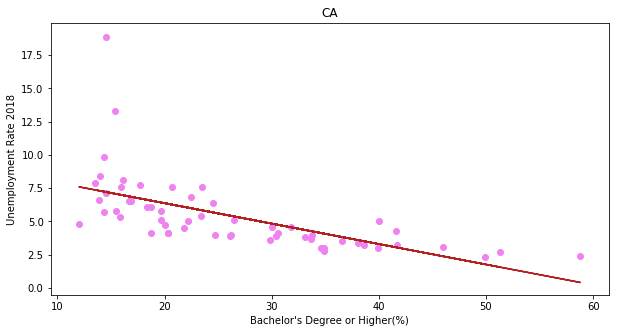

In [170]:
# What does this mean
# To see exactly what we did
# This will come in handy later
state = "ca"
df_state = get_dataframe(state)

x = df_state["Bachelor's Degree or Higher"]
y = df_state["Unemployment Rate 2018"]

plt.figure(figsize=(10,5))

m, b = np.polyfit(x,y,1)
plt.plot(x, m*x+b,'firebrick')
plt.scatter(x,y, color='violet')
plt.xlabel("Bachelor's Degree or Higher(%)")
plt.ylabel("Unemployment Rate 2018")
plt.title(state.upper())
plt.savefig("CaliUnemployment.png")
plt.show()